# us-ml-multi linear regression

In [16]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [17]:
# read the us data
us_df = pd.read_csv("db/us_energy.csv")
us_df.head()

,Unnamed: 0,Year,Produced Renewable(Billion Btu),Total Consumed(Billion Btu),GDP(Million dollar),Population(Thousand),Energy Price(dollars in million btu)
0,0,1970,4070021.0,67720114.0,0.0,205052.0,1.65
1,1,1971,4262212.0,69163993.0,0.0,207661.0,1.76
2,2,1972,4382009.0,72677208.0,0.0,209896.0,1.84
3,3,1973,4410938.0,75723857.0,0.0,211909.0,2.02
4,4,1974,4741851.0,73914525.0,0.0,213854.0,2.87


In [18]:
# select data after 1997
df = us_df.loc[us_df["Year"] > 1996] 
df.head()

,Unnamed: 0,Year,Produced Renewable(Billion Btu),Total Consumed(Billion Btu),GDP(Million dollar),Population(Thousand),Energy Price(dollars in million btu)
27,27,1997,7014328.0,94656462.0,11521900.0,272647.0,8.83
28,28,1998,6492764.0,94933435.0,12038300.0,275854.0,8.22
29,29,1999,6516554.0,96525795.0,12610500.0,279040.0,8.58
30,30,2000,6101704.0,98694694.0,13131000.0,282162.0,10.33
31,31,2001,5165027.0,96037904.0,13262100.0,284969.0,10.78


In [19]:
df.tail()

,Unnamed: 0,Year,Produced Renewable(Billion Btu),Total Consumed(Billion Btu),GDP(Million dollar),Population(Thousand),Energy Price(dollars in million btu)
43,43,2013,9242048.0,97099401.0,16495400.0,316058.0,21.42
44,44,2014,9600941.0,98267257.0,16899800.0,318386.0,21.33
45,45,2015,9565096.0,97364113.0,17386700.0,320743.0,17.30
46,46,2016,10225357.0,97230097.0,17659200.0,323071.0,15.94
47,47,2017,11094237.0,97621515.0,18050700.0,325147.0,17.30


In [20]:
# Select X and y values
X =df[["Year", "Total Consumed(Billion Btu)","GDP(Million dollar)", "Population(Thousand)",
           "Energy Price(dollars in million btu)"]]
y = df["Produced Renewable(Billion Btu)"].values.reshape(-1,1)
print(X.shape, y.shape)

(21, 5) (21, 1)


In [21]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(15, 5)
(15, 1)
(6, 5)


In [22]:
# use standard scaler to scale data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

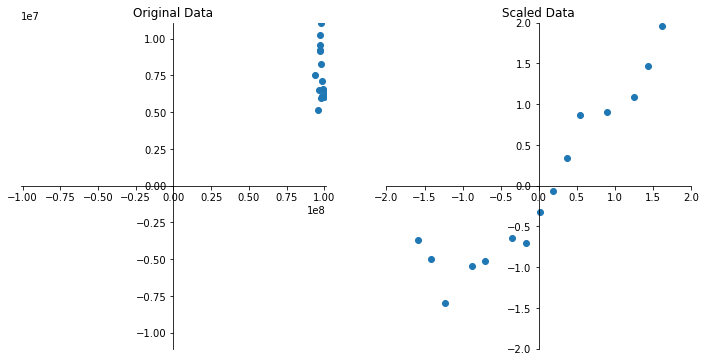

In [23]:
# plot the data to see the difference between scaled and not scaled

fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Total Consumed(Billion Btu)"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Total Consumed(Billion Btu)"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [24]:
# create the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# make predictiions and display r2

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 177252132632.52505, R2: 0.909969186233116


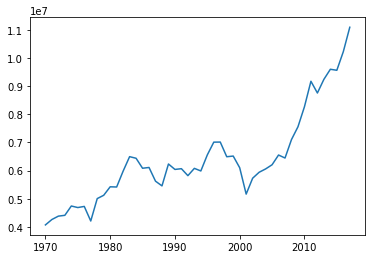

In [26]:
# use only  year and renewable production
X1 = us_df["Year"]
y1 = us_df["Produced Renewable(Billion Btu)"]
plt.plot(X1, y1)

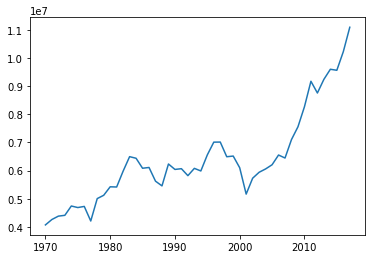

In [27]:
# use only  year and renewable production
X1 = us_df["Year"].values.reshape(-1,1)
y1 = us_df["Produced Renewable(Billion Btu)"].values.reshape(-1,1)
plt.plot(X1, y1)

In [28]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)


# create the linear regression model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

print(X1_train.shape)
print(X1_test.shape)

(36, 1)
(12, 1)


In [29]:
#make predictiions and display r2

from sklearn.metrics import mean_squared_error

predictions1 = model1.predict(X1_test)
MSE1 = mean_squared_error(y1_test, predictions1)
r2 = model1.score(X1_test, y1_test)

print(f"MSE: {MSE1}, R2: {r2}")

MSE: 324545727725.1984, R2: 0.8177762558373929


In [30]:
p=model1.predict([[2040]])
p

array([[11105077.09137198]])